In [1]:
import cv2
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load the TensorFlow Lite model
# interpreter = tf.lite.Interpreter(model_path='deepfake_model.tflite')
# interpreter.allocate_tensors()

In [3]:
# Get input and output tensors
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

model = tf.keras.models.load_model('best_deepfake_model.h5')

In [4]:
# Function to preprocess the input image
# def preprocess_image(image):
#     image = cv2.resize(image, (input_details[0]['shape'][2], input_details[0]['shape'][1]))
#     image = image.astype(np.float32) / 255.0  # Normalize to [0, 1]
#     return np.expand_dims(image, axis=0)

# input_shape = model.input_shape[1:3]

def preprocess_image(image):
    # Resize the image to match model input dimensions
    image = cv2.resize(image, (128, 128))  # Match input size used during training
    
    # Convert the image to float32 and normalize
    image = image.astype(np.float32) / 255.0
    
    # Ensure the image has the right number of dimensions
    image = np.expand_dims(image, axis=0)
    
    return image

In [5]:
# Function to classify the prediction
def classify_prediction(prediction):
    # Apply sigmoid to output data to get probability
    probability = tf.sigmoid(prediction[0][0]).numpy()
    
    # Print the probability for debugging
    print(f"Probability after sigmoid: {probability}")
    
    # Use a threshold to classify
    threshold = 0.51
    if probability < threshold:
        return "Deepfake"
    else:
        return "Real"

# Function to make predictions
# def predict(image):
#     interpreter.set_tensor(input_details[0]['index'], image)
#     interpreter.invoke()
#     output_data = interpreter.get_tensor(output_details[0]['index'])
#     classification = classify_prediction(output_data)
#     return output_data, classification

def predict(image):
    # Make prediction using the Keras model
    prediction = model.predict(image)
    classification = classify_prediction(prediction)
    return prediction, classification

# Add Functionality for Image Input

In [6]:
def input_image(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        preprocessed_image = preprocess_image(image)
        prediction, classification = predict(preprocessed_image)
        return prediction, classification
    else:
        return None, None

#  Function for Webcam Detection

In [7]:
# Function for webcam detection and single image capture
def webcam_detection():
    cap = cv2.VideoCapture(0)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Show the frame in a window
        cv2.imshow('Webcam', frame)

        # Wait for key press
        key = cv2.waitKey(1) & 0xFF
        
        if key == ord('c'):  # Capture image when 'c' is pressed
            preprocessed_frame = preprocess_image(frame)
            prediction, classification = predict(preprocessed_frame)

            # Display the prediction score and classification on the captured frame
            cv2.putText(frame, f"Prediction: {prediction[0][0]:.2f}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            cv2.putText(frame, f"Classification: {classification}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            # Show the result in an OpenCV window
            cv2.imshow('Result', frame)

            # Visualize with Matplotlib
            plt.figure(figsize=(8, 8))
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Prediction: {prediction[0][0]:.2f}, Classification: {classification}")
            plt.axis('off')
            plt.show()

            cv2.waitKey(0)  # Wait for a key press to close the result window

        elif key == ord('q'):  # Exit the window when 'q' is pressed
            break

    cap.release()
    cv2.destroyAllWindows()

#  Run the Model with User Input

In [8]:
# Main function to run detection
def run_detection():
    print("Press 'i' to input an image or 'c' for webcam detection. Press 'q' to quit.")
    while True:
        key = input("Choose an option (i/c/q): ")

        if key == 'i':
            image_path = input("Enter the path of the image file: ")
            prediction, classification = input_image(image_path)
            if prediction is not None:
                print(f"Prediction: {prediction[0][0]:.2f}, Classification: {classification}")
            else:
                print("Could not read the image. Please check the path.")

        elif key == 'c':
            print("Starting webcam detection. Press 'c' to capture a single image, 'q' to quit.")
            webcam_detection()

        elif key == 'q':
            break

        else:
            print("Invalid option. Please choose 'i', 'c', or 'q'.")


Press 'i' to input an image or 'c' for webcam detection. Press 'q' to quit.
Choose an option (i/c/q): c
Starting webcam detection. Press 'c' to capture a single image, 'q' to quit.
1/1 [==============================] - 0s 69ms/step
Probability after sigmoid: 0.6738255620002747


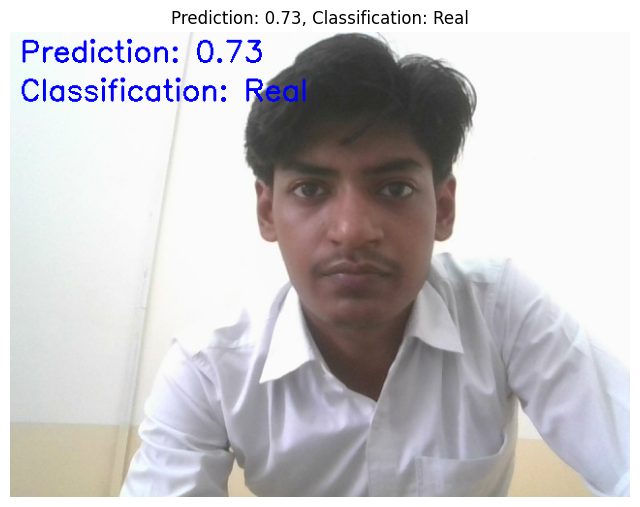

Choose an option (i/c/q): i
Enter the path of the image file: fake_0.jpg
1/1 [==============================] - 0s 93ms/step
Probability after sigmoid: 0.5050619840621948
Prediction: 0.02, Classification: Deepfake
Choose an option (i/c/q): i
Enter the path of the image file: real_5.jpg
1/1 [==============================] - 0s 87ms/step
Probability after sigmoid: 0.7176539301872253
Prediction: 0.93, Classification: Real
Choose an option (i/c/q): q


In [25]:
run_detection()